# Outliers and their impact on machine learning

An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data


- Outliers can be beneficial for some of usecase. 
- ex: Credit card fraud, network traffic company.
- Suspicious things in credit card info willbe an outlier as it is not matching with the existing things like legitimate credit card info. 
- In network, hackers may enter with different info and that would be outlier as it is not matching
- Medical: cancer prediction. Some info will be outlier and it can be related to cancer and that is much need in predictions 

#### Should we remove outliers? 

##### Titanic
- Depending on context and use case, outliers deserves attention. 
- In some of usecases we can ignore completely.
- In titanic dataset, we can remove outliers. Because the prediction is "Whether the person is surviving or not". As it was an accident we can not say that because of age/fare that person is either survived or not. 
- If I think otherwise, gender= female and kids (with less age) was given more importance to vacate the cruise before men. 
- But in titanic dataset, age outliers are 80+. 
- This is how we need to decide whether to keep the outliers or exclude. 


##### Sales forcecasting 
- There are sudden spikes which make outliers. Should we keep it or not? 
- These spikes are important, because something would have caused spike. 
- This is why we shouldn't delete outliers. 



## Which machine learning models which are sensitive to Outliers? 

1. <b>Naive Bayes </b>:------------------Not sensitive to outliers
2. <b>SVM </b>:--------------------------Not sensitive. 
3. <b>Linear Regression </b>:------------Sensitive to outliers 
4. <b>Logistic Regression </b> :         Sensitive
5. <b>Decision tree regressor or classifier </b>: Not sensitive to outliers
6. <b>Ensemble (random forest, XGBoost, GB) </b>: Not sensitive (as decision tree is not sensitive, all mentioned here are not)
7. <b>KNN </b>: -------------------------Sensitive to outliers (eucledian distance)  (doubt)
- If ther are less outliers, and I have selected k=3, nearest ones are clustered and the outliers are left out. By this we can say that the KNN is not sensitive. 
8. <b>K means </b>:---------------------Sensitive to outliers (eucledian distance) 
9. <b>Heirachical </b>:-----------------Sensitive 
10. <b>PCA </b>: -----------------------Extremely Sensitive
- When I have, variance is focused in PCA and if there are outliers then variance cant be captured correctly.
11. <b>Neural Networks </b>:------------Sensitive
- If NN has outliers, and when weights are multiplied then weight calculation and also updating will be incorrect. 
12. <b>LDA </b>---------------------------------

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df["Age"].isnull().sum()

177

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

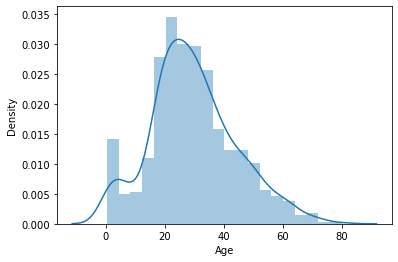

In [5]:
sns.distplot(df["Age"].dropna())

#age doesnt have much outliere and is normal distribution. Lets take one with outliers

/Users/melissavidiera/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

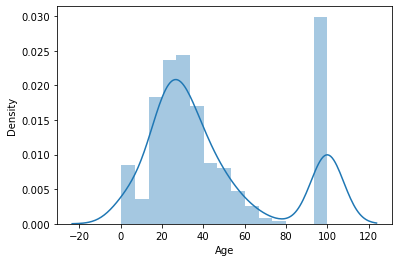

In [7]:
# create a new outliers
# as there are lot of na values in Age, fill it with some higher number so that we get outliers
# within the graph, fill na with 100, not in df. 

sns.distplot(df["Age"].fillna(100))

### Dealing with outliers in Gaussian Distribution 

Text(0, 0.5, 'Number of passengers')

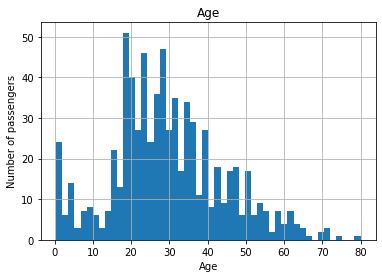

In [10]:

figure= df.Age.hist(bins= 50)
figure.set_title("Age")
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

#here age is following normal (gaussian) distribution. Not exaclty normal, but in a way

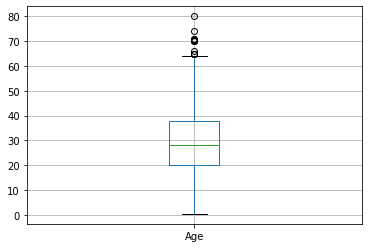

In [13]:
#to find outliers, use boxplot

figure=df.boxplot(column="Age")

#dotted points are outliers
#even though I havent filled nan value, there are outliers

In [14]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming age follows gaussian distribution, we will calculate the boundaries which differetiates the outliers (imp)

- If we partition with 3 standard deviations in right and left. 
- Partition the guassian data with mean (middle line), consider the 3 standard deviation on the left and right. 
- Now consider outliers as the data which does not belong to these 3 std deviations
- ie, left of negative standard deviation and right of positive standard deviation 

How?
- to calculate upper boundary: Calculate mean, add with 3(age.standard deviation) multiplied by 3
- to calculate upper boundary: Calculate mean, subtract with 3(age.standard deviation) multiplied by 3

In [24]:
upper_bound= df["Age"].mean()+ 3* df["Age"].std()
lower_bound= df["Age"].mean()- 3* df["Age"].std()

print("Upper Boundary: " ,upper_bound)
print("Lower Boundary:", lower_bound)
print("Mean value of Age:", df["Age"].mean())

#in age we do not have negative values

Upper Boundary:  73.27860964406095
Lower Boundary: -13.88037434994331
Mean value of Age: 29.69911764705882


In [25]:
# as age can not be negative 


#computing Inter Quantile Range (IQR) to calculate boundaries using quantile()
# IQR= 75 percentile - 25 percentile

IQR= df.Age.quantile(0.75)- df.Age.quantile(0.25)
IQR

#IQR is calculated because we are taking outliers which falls after 75 percentile(after 3/4th)  
#and before 25 percentile (before 1/4th)

17.875

In [26]:
lower_bridge=df["Age"].quantile(0.25)-(IQR*1.5)#calculate 0.25 quantile and subtract so that we can take left
upper_bridge=df["Age"].quantile(0.75)+(IQR*1.5)#calculate 0.75 quantile & add so that we can take data in right
#1.5 value is set by domain person, normally for gaussian dist, we wil take IQR*1.5

In [27]:
print(lower_bridge)
print(upper_bridge)
#age cant be negative, so we can not consider that as outlier

-6.6875
64.8125


In [28]:
# to calculate very extreme boundaries, we multiply IQR by 3 (rather than 1.5)
extreme_lower_bridge=df["Age"].quantile(0.25)-(IQR*3)
extreme_upper_bridge=df["Age"].quantile(0.75)+(IQR*3)

In [29]:
print(extreme_lower_bridge)
print(extreme_upper_bridge)

-33.5
91.625


## When features are skewed

Text(0, 0.5, 'Number of passengers')

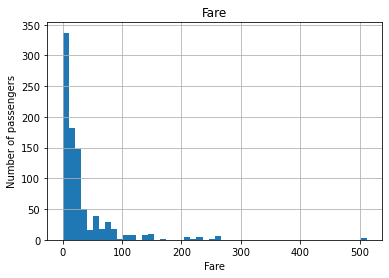

In [31]:
figure= df.Fare.hist(bins= 50)
figure.set_title("Fare")
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')

# data here are clearly right skewed. 

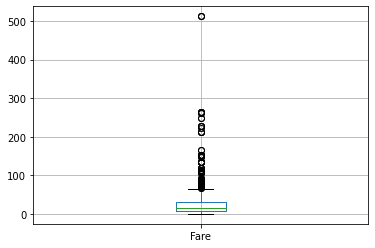

In [33]:
figure=df.boxplot(column="Fare")
#so many outliers

In [34]:
df["Fare"].describe()
#distance btw Max and 75% is pretty huge, which says that there are lots of outliers


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
#when the data is gaussian, we calculated upper and lower boundary. 

# as here the data is skewed, we need will directly consider upper and lower bridge (dont calculate boundaries)

IQR= df.Fare.quantile(0.75)- df.Fare.quantile(0.25)
IQR

23.0896

In [39]:
lower_bridge=df["Fare"].quantile(0.25)-(IQR*1.5)
upper_bridge=df["Fare"].quantile(0.75)+(IQR*1.5)

In [40]:
print(lower_bridge)
print(upper_bridge)

#here I can see that the upper is 65, but my max is 512, so I will find extreme outlier 

-26.724
65.6344


In [42]:
#Always consider extreme outliers in skewed data

extreme_lower_bridge=df["Fare"].quantile(0.25)-(IQR*3)
extreme_upper_bridge=df["Fare"].quantile(0.75)+(IQR*3)
print(extreme_lower_bridge)
print(extreme_upper_bridge)

#fare can not be negative, hence I am not considering -61
#still better than considering INQ*3

-61.358399999999996
100.2688


# Replacing outliers

- I found that outlier for age is 73 and fare is 100 

In [ ]:
# WRT age outlier is 73 

In [44]:
data= df.copy()

In [48]:
#wherever the data df's row is greater than 73 wrt age feature-> then replace all those with 73. 
data.loc[data["Age"]> 73, "Age"]=73

Text(0, 0.5, 'Number of passengers')

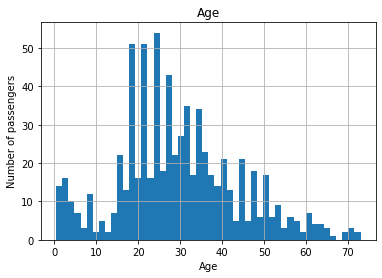

In [56]:
figure= data.Age.hist(bins= 50)
figure.set_title("Age")
figure.set_xlabel('Age')
figure.set_ylabel('Number of passengers')

#73 is last point on age

In [49]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
data.loc[data["Fare"]>=100, "Fare"]=100

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Number of passengers')

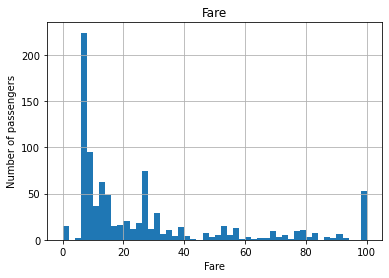

In [55]:
figure= data.Fare.hist(bins= 50)
figure.set_title("Fare")
figure.set_xlabel('Fare')
figure.set_ylabel('Number of passengers')

#here I can see that the max fare is 100 (before it was 5oo euros)

## Summary
1. <b>Gaussian distribution</b>
- If data is normally distributed, calculate upper and lower bound. (3*std dev). 
- Check both values. If lower is negtive and not applicable then discard it.
- Replace all outliers with upper bound.


2. <b>Features are Skewed </b>
- If the data is skewed, calculate IRQ. 
- Calculate lower and upper bridge
- Calculate extreme upper and lower brige by multiplying with (IRQ*3)
- Replace all outliers with this highest value.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[["Age","Fare"]].fillna(0),data["Survived"],test_size= 0.33) 
#as I have removed upper extreme, I will fillna as 0 (lower extreme)
# Applying algorithms 

### Logistic regression - sensitive

In [61]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred1= classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy score={}".format(accuracy_score(y_test, y_pred)))
print("ROC={}".format(roc_auc_score(y_test, y_pred)))

Accuracy score=0.6542372881355932
ROC=0.6047058823529412


### Ensemble technique: Random Forest- Not sensitive to outliers


In [67]:

from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred1= classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy score={}".format(accuracy_score(y_test, y_pred)))
print("ROC={}".format(roc_auc_score(y_test, y_pred)))

#as random forest is not sensitive to ouliers, we get much better accuracy. 

Accuracy score=0.6576271186440678
ROC=0.6298823529411766


In [ ]:
# try out for other 